<a href="https://colab.research.google.com/github/gelgel5633/self-study/blob/main/%ED%95%84%EC%82%AC/(2)Natural_Language_Processing_with_Disaster_Tweets_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 출처
- 노트북 제목 : your first NLP competition submission
- competition명 : Natural Language Processing with Disaster Tweets
- 링크 : https://www.kaggle.com/code/naim99/your-first-nlp-competition-submission/notebook

# 단계별 텍스트 분류

NLP는 컴퓨터과학, 인공지능, 정보공학 및 인간-컴퓨터 상호작용의 하위 분야 입니다. 이 분야는 대량의 자연어 데이터를 처리하고 분석하기 위해 컴퓨터를 프로그래밍하는 방법에 중점을 둡니다. 언어를 읽고 이해하는 과정은 언뜻 보이는 것보다 훨씬 더 복잡하기 때문에 수행하기가 어렵습니다.


## 목적
해당 커널의 목표는 다음과 같습니다.
- 기본 EDA
- 데이터 정리를 위한 초보자 가이드
- 피쳐 분석 & 추출
- 모델링 및 평가지표
- 결과 제출

## 목차
###소개  
- 데이터에 대한 소개

### 데이터 불러오기 및 체크
- 라이브러리 호출
- 데이터셋 불러오기  

### EDA(탐색적 전처리)
- 타겟 변수 분포
- 트윗의 탐색적 분석
- 다른 변수에 대한 탐색적 분석  

###데이터 준비
- 데이터클리닝
- 불용어 제거
- 토크나이징
- 어간 추출
- 표제어 추출
- 데이터 분리  

### 피쳐추출
- Bag of Words
- Tf-idf Vectorizer
- 행렬 차원 감소  

### 모델 훈련
- MultinomialNB


## 소개

- __필요한 파일은 무엇이 있습니까?__   
train.csv, test.csv, sample_submission.csv가 필요합니다  


- __데이터 형식은 무엇이어야 합니까?__   
훈련 및 테스트 세트의 각 샘플에는 다음 정보가 있습니다.
    1. 트윗의 텍스트
    2. 트윗의 키워드(비어있을 수도 있습니다)
    3. 트윗이 전송된 위치(비어있을 수도 있습니다)  


- __무엇을 예측해야 합니까?__  
주어진 트윗이 실제 재난에 관한것인지 여부를 예측할 것입니다. 재난이라면 1, 아니라면 0을 예측합니다

  
- __파일__
    1. train.csv - 훈련셋
    2. test.csv - 테스트셋
    3. sample_submission.csv - 올바른 형식의 샘플 제출 파일

### 데이터셋에 있는 컬럼들
- id : 각 트윗별 고유 식별자
- text - 트윗의 텍스트
- location - 트윗이 어디에서 보내졌는지(비어있을 수도 있습니다)
- keyword - 트윗의 특정 키워드(비어있을 수도 있습니다)
- target - train.csv에만 존재합니다. 이것은 트윗이 실제 재난에 관한 것인지(1) 아닌지(0)를 나타냅니다 


## 데이터 불러오기 및 체크
### 라이브러리 호출

In [1]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np # linear algebra = 선형대수
import pandas as pd # 데이터 전처리, CSV파일 Input, Output

import os
import re # regex는 정규표현식을 문자열에 적용하고 일치하는 하위 문자열을 반환합니다
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
from nltk.stem import WordNetLemmatizer
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import Counter
plt.style.use("ggplot")
stop = set(stopwords.words("english"))
import scikitplot as skplt
from nltk.tokenize import word_tokenize
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
# 원래는 from keras.optimizers import Adam 
# 위 코드가 실행되지 않아서 찾았을 때 아래처럼 import 를 했을 때 정상적으로 실행됨
from tensorflow.keras.optimizers import Adam
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 데이터셋 불러오기

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/transcription/Natural Language Processing with Disaster Tweets/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/transcription/Natural Language Processing with Disaster Tweets/test.csv")

In [4]:
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
print("train에는 {} 행과 {} 열이 있습니다". format(train_data.shape[0], train_data.shape[1]))
print("test에는 {} 행과 {} 열이 있습니다". format(test_data.shape[0], test_data.shape[1]))

train에는 7613 행과 5 열이 있습니다
test에는 3263 행과 4 열이 있습니다


In [6]:
train_data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [7]:
# 텍스트 열에 있는 트윗을 표시합니다.
train_data["text"][11]

'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding'

### 타겟변수 분포

다른 작업을 시작하기 전에 클래스 분포를 확인하겠습니다. 클래스는 0과 1만이 존재합니다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

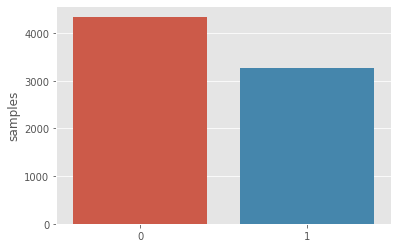

In [8]:
x = train_data.target.value_counts()
sns.barplot(x.index,x)
# 현재 축을 얻고, figure에 축이 없다면 새로운 축을 생성합니다
plt.gca().set_ylabel("samples")

클래스 1보다 클래스0의 트윗이 더 많습니다.

### 트윗의 탐색적 분석  

먼저 가장 기초적인 문자 수준, 단어 수준 및 문장 수준 분석을 할 것입니다.
  
트윗의 문자 수 입니다

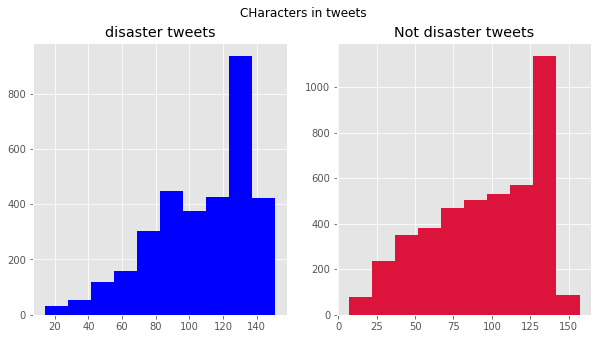

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
# 문자열 길이 출력
tweet_len = train_data[train_data["target"] == 1]["text"].str.len()
ax1.hist(tweet_len, color = "blue")
ax1.set_title("disaster tweets")

tweet_len = train_data[train_data["target"]==0]["text"].str.len()
ax2.hist(tweet_len, color = "CRIMSON")
ax2.set_title("Not disaster tweets")
fig.suptitle("CHaracters in tweets")
plt.show()

둘의 분포는 거의 동일한 것 같습니다. 120~140 트윗의 문자가 둘 중 가장 일반적입니다

__트윗 단어의 수__

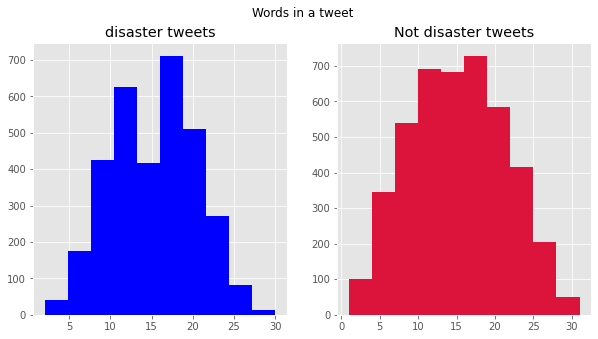

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
# 공백을 기준으로 = 단어 갯수만큼 나눠지므로 len 을 사용하면 단어의 수가 나옵니다
# Series의 형태로 나오기 때문에 글자의 수가 아닌 단어의 수로 출력됩니다.
tweet_len = train_data[train_data["target"]==1]["text"].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color = "blue")
ax1.set_title("disaster tweets")

tweet_len = train_data[train_data["target"]==0]["text"].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color = "CRIMSON")
ax2.set_title("Not disaster tweets")
fig.suptitle("Words in a tweet")
plt.show()

__트윗의 평균 단어 길이__

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each tweet')

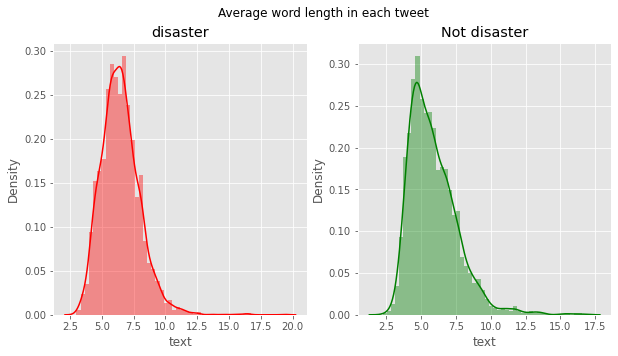

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
# 위와는 다르게 단어 하나마다 모든 단어를 character 단위로 쪼개서 단어의 갯수를 세는 데에 사용
word = train_data[train_data["target"]==1]["text"].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color = "red")
ax1.set_title("disaster")

word = train_data[train_data["target"]==0]["text"].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax= ax2, color = "green")
ax2.set_title("Not disaster")
fig.suptitle("Average word length in each tweet")

In [12]:
word

15                                       [6, 2, 4]
16                                       [1, 4, 6]
17                                       [6, 2, 6]
18                                 [2, 3, 2, 2, 4]
19                                      [4, 1, 21]
                           ...                    
7581    [11, 5, 10, 2, 3, 7, 4, 3, 8, 7, 2, 8, 22]
7582            [7, 6, 1, 5, 4, 7, 8, 5, 1, 4, 22]
7584    [5, 5, 3, 5, 2, 8, 9, 7, 7, 8, 13, 20, 23]
7587                                       [6, 11]
7593          [1, 4, 5, 1, 6, 4, 4, 3, 8, 2, 6, 5]
Name: text, Length: 4342, dtype: object

위에 적용된 word를 출력할 때 위와같이 한 문장에서 각 단어가 몇 글자인지 확인이 가능합니다

__빈도__ 이제 말뭉치에서 각 단어의 빈도를 계산하고자 합니다

In [13]:
corpus = []

z = 0

for x in train_data["text"].str.split():
    for i in x:
        corpus.append(i)
        '''
        while z==0:
            print(x)
            print(i)
            z+=1
            print(type(x))
            print(type(i))
            print(type(train_data["text"].str.split()))
        '''

================================================================================
------------------------

# 추가내용

위의 독스트링을 풀었을 때 다음과 같은 결과를 얻을 수 있습니다

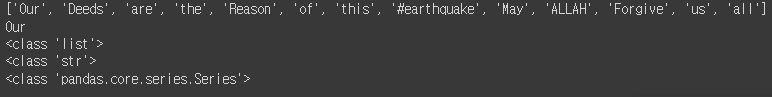

즉
- str.split() 을 사용했을 때 : Series
- for문을 통해 x로 넘어갔을 때 list
- 한 번 더 for 문을 사용해서 넘어갔을 때 str

형태가 되는 것을 확인 할 수 있습니다
-> 왜 character 단위로 쪼개지지 않는지에 대한 해답이 될 수 있습니다


================================================================================
-------------------------------------------------------------------------

Our


<BarContainer object of 30 artists>

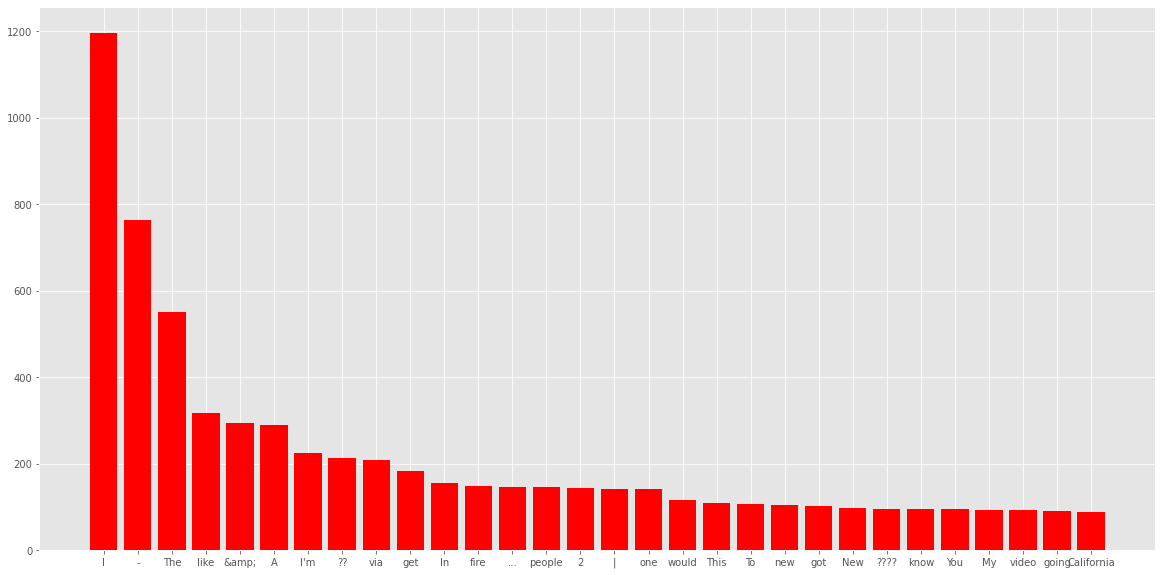

In [14]:
dic = defaultdict(int)

yy = True

for word in corpus:
    # word 출력값 : Our
    # character 단위로 나뉠 줄 알았는데 문자가 그대로 들어간 것을 확인할 수 있습니다.
    while yy == True:
        print(word)
        yy=False
    if word not in stop:
        dic[word] +=1

top = sorted(dic.items(), key=lambda x: x[1], reverse = True)[:30]

x,y = zip(*top)
# plt.figure()로 매번 사이즈를 설정하는 불편함을 줄이기 위해 rcParams를 사용한다고 합니다.
# 링크 : https://financedata.github.io/posts/faq_matplotlib_default_chart_size.html
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x,y,color = "red")

<BarContainer object of 30 artists>

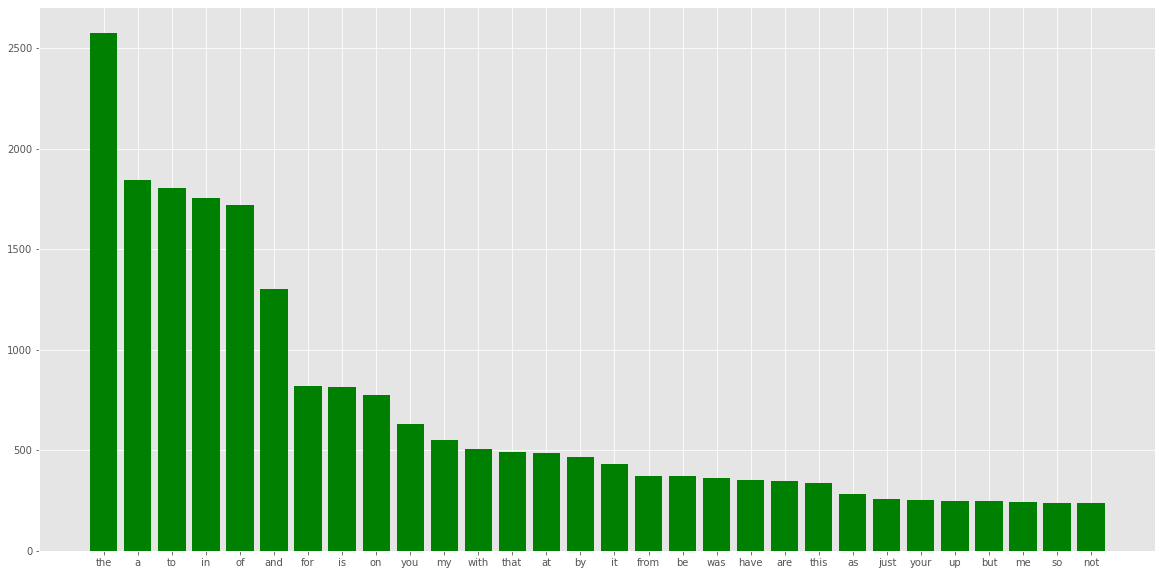

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words("english")
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top = sorted(dic.items(), key = lambda x: x[1], reverse=True)[:30]

x,y = zip(*top)
plt.rcParams["figure.figsize"] = (20,10)
# 그림 환경을 사용하지 않고 크기를 변경하려는 경우에도 해결방법이 있습니다
# 예를 들어 plt.plot을 사용하는 경우 너비와 높이로 튜플을 설정할 수 있습니다.
plt.bar(x,y, color = "green")

트윗에서 구둣점을 살펴보겠습니다

<BarContainer object of 23 artists>

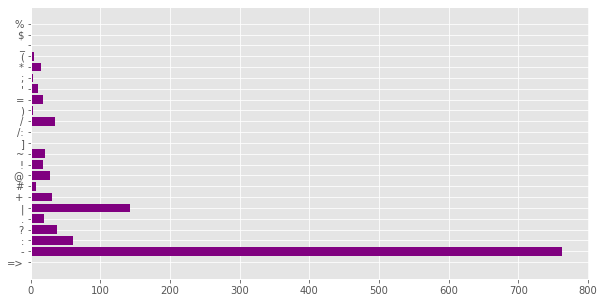

In [16]:
plt.figure(figsize = (10,5))
import string
dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i] +=1

x,y = zip(*dic.items())
plt.barh(x,y,color= "purple")

각 대상에 대한 상세 사항

In [17]:
from collections import Counter

words = train_data[train_data.target==0].text.apply(lambda x: [word.lower() for 
                                                               word in x.split()])
h_words = Counter()

for text_ in words:
    h_words.update(text_)

print(h_words.most_common(50))

[('the', 1877), ('a', 1238), ('to', 1181), ('i', 1052), ('and', 911), ('of', 895), ('in', 805), ('you', 625), ('is', 586), ('my', 541), ('for', 486), ('on', 424), ('with', 374), ('-', 374), ('that', 357), ('it', 341), ('this', 286), ('be', 284), ('like', 250), ('have', 240), ('by', 240), ('so', 235), ('are', 231), ('at', 229), ('just', 229), ('your', 225), ('me', 221), ('was', 216), ('but', 216), ('not', 198), ("i'm", 195), ('&amp;', 190), ('??', 183), ('out', 179), ('up', 178), ('will', 177), ('if', 177), ('from', 177), ('all', 173), ('new', 163), ('get', 161), ('as', 160), ('or', 155), ('we', 148), ('when', 144), ('has', 143), ('he', 143), ('no', 140), ('about', 139), ('they', 133)]


In [18]:
words = train_data[train_data.target==1].text.apply(lambda x: [word.lower() for word in x.split()])
h_words = Counter()

for text_ in words:
    h_words.update(text_)

print(h_words.most_common(50))

[('the', 1330), ('in', 1144), ('of', 919), ('a', 897), ('to', 753), ('and', 494), ('on', 410), ('for', 394), ('-', 389), ('is', 344), ('at', 303), ('i', 284), ('by', 274), ('from', 243), ('with', 188), ('that', 181), ('after', 181), ('this', 177), ('as', 167), ('are', 166), ('was', 165), ('it', 163), ('fire', 151), ('have', 140), ('my', 130), ('over', 123), ('you', 121), ('more', 121), ('via', 117), ('up', 114), ('an', 113), ('be', 112), ('...', 106), ('&amp;', 105), ('has', 104), ('suicide', 103), ('who', 100), ('no', 99), ('disaster', 97), ('but', 95), ('police', 94), ('people', 93), ('been', 93), ('when', 93), ('killed', 92), ('like', 91), ('not', 90), ('california', 88), ('than', 85), ('just', 84)]


### 다른 변수에 대한 탐색적 분석
__키워드 및 장소__

1. 결측치  
훈련 세트와 테스트 세트 모두 키워드 및 위치에서 누락된 값의 비율이 동일합니다.  
훈련 세트와 테스트 세트에서 키워드의 0.8%가 누락되었고, 훈련 세트와 테스트 세트에서 위치는 33% 누락되었습니다. 훈련 세트와 테스트 세트 간의 결측값 비율이 너무 가깝기 때문에 동일한 샘플에서 가져온 것일 가능성이 큽니다.  
이러한 특징들에서 누락된 값은 각각 no_keyword, no_location으로 채워집니다.

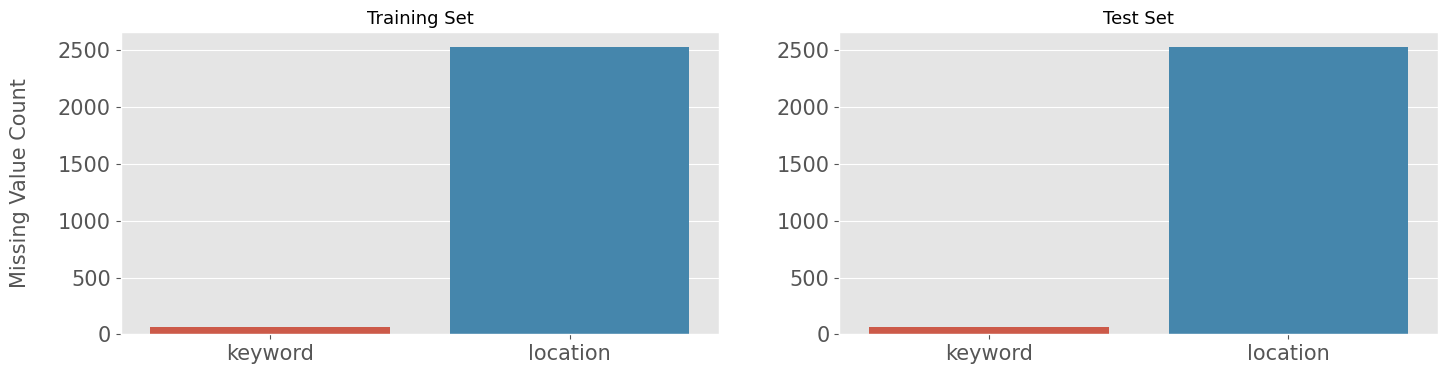

In [19]:
missing_cols = ["keyword", "location"]

fig, axes = plt.subplots(ncols = 2, figsize=(17,4), dpi = 100)

sns.barplot(x=train_data[missing_cols].isnull().sum().index, y = train_data[missing_cols].isnull().sum().values, ax= axes[0])
sns.barplot(x=train_data[missing_cols].isnull().sum().index, y = train_data[missing_cols].isnull().sum().values, ax= axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
# tick_params 로 tick에 대한 설정이 가능
# axis = 으로 축을 설정
# labelsize = 으로 tick 글자 크기 조절가능
axes[0].tick_params(axis = "x", labelsize = 15)
axes[0].tick_params(axis = "y", labelsize = 15)
axes[1].tick_params(axis = "x", labelsize = 15)
axes[1].tick_params(axis = "y", labelsize = 15)

axes[0].set_title("Training Set", fontsize = 13)
axes[1].set_title("Test Set", fontsize = 13)

plt.show()

for df in [train_data, test_data]:
    for col in ['keyword','location']:
        df[col] = df[col].fillna(f'no_{col}')

1. 데이터 값의 고유성(cardinality)과 분포  

위치는 자동으로 생성되지 않으며 사용자 입력입니다. 그렇기 때문에 지저분하고 고유한 값이 많습니다. 이것을 피쳐로 사용하면 안됩니다.  

다행히도 일부 단어는 하나의 컨텍스트(문맥)에서만 사용할 수 있습니다. 키워드는 매우 다른 트윗 수와 타겟의미를 가지고 있습니다.
키워드는 그 자체만으로 피쳐로 사용될 수 있고 텍스트에 추가되는 단어로 사용될 수도 있습니다. 훈련 세트의 모든 단일 키워드는 테스트 세트에 존재합니다. 훈련 세트와 테스트 세트가 동일한 샘플에서 나온 경우 키워드에 대상 인코딩을 사용할 수도 있습니다

In [20]:
print(f'키워드에서 고유한 값의 수 = {train_data["keyword"].nunique()} \
(Train) - {test_data["keyword"].nunique()} (Test)')

print(f'위치에서 고유한 값의 수 = {train_data["location"].nunique()} \
 (Train) - {test_data["location"].nunique()} (Test)')

키워드에서 고유한 값의 수 = 222 (Train) - 222 (Test)
위치에서 고유한 값의 수 = 3342  (Train) - 1603 (Test)


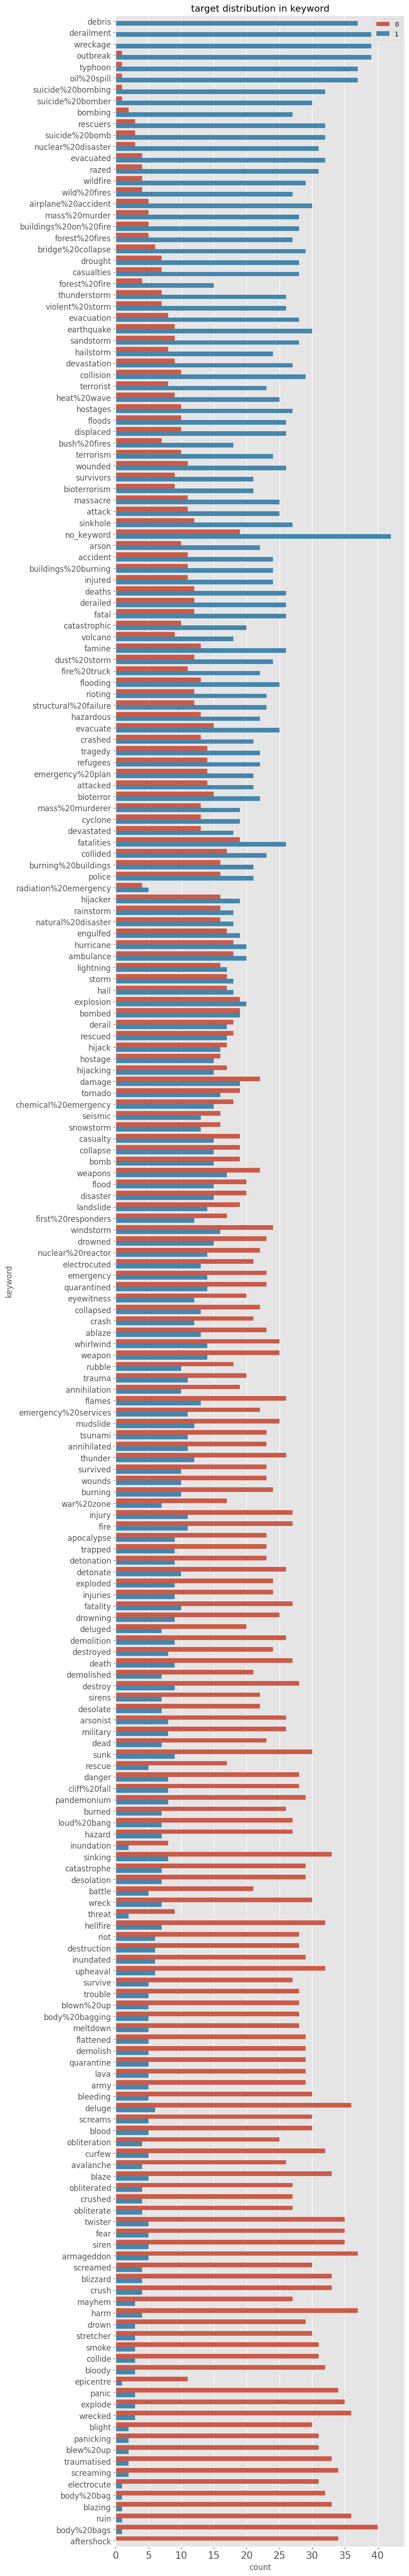

In [21]:
train_data["target_mean"] = train_data.groupby("keyword")["target"].transform("mean")

fig = plt.figure(figsize = (8,72), dpi = 100)

sns.countplot(y = train_data.sort_values(by="target_mean", ascending=False)["keyword"],\
              hue = train_data.sort_values(by="target_mean", ascending =False)["target"])

plt.tick_params(axis = "x", labelsize = 15)
plt.tick_params(axis = "y", labelsize = 12)
plt.legend(loc = 1)
plt.title("target distribution in keyword")

plt.show()

train_data.drop(columns=["target_mean"], inplace = True)

### __해시태그 분석__

### __해시태그에 대한 소규모 분석을 통해, 이 작업에 대한 \#가능이 판별 가능한지를 판단합니다__

__정규표현식__  
문자열의 시작부분에서 4자리 숫자를 찾기 위한 것이며, 우리의 데이터는 충분히 이 작업을 수행하는데 적합합니다.  
원시문자열은 백슬래시가 더이상 이스케이프 문자가 아님을 의미하며, 정규표현식으로는 r'^(\d{4}) 입니다'

In [25]:
def clean_text(df, text_field, new_text_field_name):
    # 소문자화
    df[new_text_field_name] = df[text_field].str.lower()

    # 숫자 제거
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    # url 제거
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"https?://\S+", "", elem))
    # html 태그 제거
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"<.*?>", "", elem))
    # 이모지 제거
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", elem))
    return df

data_clean = clean_text(train_data, 'text', "text_clean")
data_clean_test = clean_text(test_data, "text", "text_clean")
data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


## 불용어 제거
__불용어 제거는 무엇인가요?__
불용어는 검색을 위해 항목을 인덱싱할 때와 결과로 검색할 때 무시하도록 검색 엔진에 프로그래밍된 일반적으로 사용되는 단어(예를 들어 the, a, in 등)입니다.  

우리는 이러한 단어가 데이터베이스의 공간을 차지하거나 귀중한 처리 시간을 가져가는 것을 원하지 않습니다. 이를 위해 불용어로 간주되는 단어 목록으 저장하여 쉽게 제거할 수 있습니다. NLTK에는 16개의 다른 언어로 저장된 불용어 목록이 있습니다. nltk_data 디렉토리에서 찾을 수 있고 주소는 아래와 같습니다.(홈 디렉토리 이름을 반드시 수정해주세요)  
링크 : http://www.nltk.org/nltk_data/
  


In [26]:
from nltk.corpus import stopwords
stop = stopwords.words("english")
data_clean["text_clean"] = data_clean["text_clean"].apply(lambda x : " ".join([word for word in x.split() \
                            if word not in (stop)]))
data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...


## 토큰화

토큰화는 문자열, 텍스트를 토큰화하거나 분할하는 프로세스입니다. 토큰은 단어가 문장의 토큰이고 문장이 단락의 토큰인 것처럼 토큰을 부분으로 생각할 수 있습니다

In [27]:
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean["text_tokens"] = data_clean["text_clean"].apply(lambda x : word_tokenize(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for..."
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]"
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie..."
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ..."


## 어간추출

In [28]:
# 어간추출
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("{}을 어간추출한 것은 {} 입니다".format(w, porter_stemmer.stem(w)))

studies을 어간추출한 것은 studi 입니다
studying을 어간추출한 것은 studi 입니다
cries을 어간추출한 것은 cri 입니다
cry을 어간추출한 것은 cri 입니다


In [31]:
# 표제어 추출
import nltk
# omw-1.4 를 다운로드하지 않으면 에러 발생
# = Open Multilingual Wordnet
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("{}을 표제어추출을 한 결과는 {} 입니다".format(w, wordnet_lemmatizer.lemmatize(w)))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


studies을 표제어추출을 한 결과는 study 입니다
studying을 표제어추출을 한 결과는 studying 입니다
cries을 표제어추출을 한 결과는 cry 입니다
cry을 표제어추출을 한 결과는 cry 입니다


In [32]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text

data_clean["text_clean_tokens"] = data_clean["text_tokens"].apply(lambda x: word_stemmer(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for...","[deed, reason, #, earthquak, may, allah, forgi..."
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, rong, sask, ., canada]"
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie...","[resid, ask, 'shelter, place, ', notifi, offic..."
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,...","[,, peopl, receiv, #, wildfir, evacu, order, c..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, rubi, #, alaska, smoke, #, ..."


## 표제어 추출

In [33]:
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

data_clean["text_clean_tokens"] = data_clean["text_tokens"].apply(lambda x: word_lemmatizer(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for...","[deed, reason, #, earthquake, may, allah, forg..."
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]"
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie...","[resident, asked, 'shelter, place, ', notified..."
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,...","[,, people, receive, #, wildfire, evacuation, ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, ruby, #, alaska, smoke, #, ..."


__왜 표제어 추출이 어간추출보다 좋을까요? 어간추출 알고리즘은 단어에서 접미사를 잘라내어 작동합니다. 넓은 의미에서 단어의 시작이나 끝을 잘라냅니다__  
반면, 표제어 추출은 더 강력한 연산으로 단어의 형태소 분석을 고려합니다.
모든 굴절형식의 기본 형식인 보조정리를 반환합니다. 사전을 만들고 단어의 적절한 형태를 찾기 위해서는 심도 있는 언어 지식이 필요합니다. 형태소 분석은 일반적인 작업인 반면, 보조 정리는 사전에서 적절한 형식을 찾는 지능적인 작업 입니다. 따라서 표제어는 더 나은 기계 학습 기능을 형성하는 데 도움이 됩니다.  
연구와 공부를 위한 형태소 분석을 보면, 출력은 동일하지만 보조정리는 연구를 위한 연구와 공부를 위한 공부 모두 토큰에 대해 다른 보조 정리를 제공합니다. 따라서 기계를 훈련하기 위해 기능 세트를 만들어야 할 때 표제어가 선호된다면 좋을 것입니다.

## 데이터 나누기

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(data_clean["text_clean"], data_clean["target"], \
                                                    test_size = 0.2, random_state = 10)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6090,)
(1523,)
(6090,)
(1523,)


## 피쳐 추출 : tf-idf

벡터화는 텍스트 문서 모음을 숫자 특징 벡터로 바꾸는 일반적인 프로세스입니다. 이 특정 전략(토큰화, 계산 및 정규화)을 Bag of Words 또는 Bag of n-grams 표현이라고 합니다.(representation의 대표적인 예 : wordembedding)  
문서는 문서 내 단어의 상대적 위치 정보를 완전히 무시하고 단어 발생만으로 설명합니다

__countvectorizer__  
countvectorizer는 텍스트 문서 모음을 토큰 수의 행렬로 변환합니다. 즉, 각 문서의 토큰 발생 횟수입니다. 이 구현은 카운트의 희소 표현을 생성합니다.  
=> 각 단어의 등장 빈도를 딕셔너리 형태로 표현한 것 (예시 : {"the":20, "new":5........})  
=> 혹은 각 문장별로 단어를 원 핫 인코딩하여 표현하는 것(아래 데이터프레임처럼)

In [38]:
vectorizer = CountVectorizer(analyzer="word", ngram_range = (1,1))
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), index = ["sentence "+str(i) for i in range(1,1+len(X_train))],
             columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,__,__ohhmyjoshh,__scrambledeggs,__srajapakse__,_animaladvocate,_ashj,_asianshawtyy,_bookofdaniel,_charleyisqueen,_dangdaddy,...,ûïyou,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


말뭉치 내부의 문장에서 토큰의 위치(=단어)는 완전히 무시됩니다. bag-of-words 표현을 구성할 때 기본 구성은 최소 2자의 영숫자 문자를 추출하여 문자열을 토큰화하는 것입니다.(구둑점은 완전히 무시되고, 항상 토큰 구분 기호로 처리됩니다)  
특정 패턴만 고려하는 token_pattern 인수를 사용하여 토큰에 대해 원하는 패턴을 지정할 수도 있습니다. 다음 예에서는 토큰이 3개 이상의 알파벳으로 구성된 경우만 고려합니다

In [39]:
# \b는 단어 경계를 구분하게 해줍니다. 한글에서는 경계를 구분할 수 없는 경우가 있으므로 전방탐색, 후방탐색을 사용하여야 합니다.
vectorizer = CountVectorizer(analyzer = "word", token_pattern = r'\b[a-zA-Z]{3,}\b', ngram_range = (1,1))
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), index = ["sentence " + str(i) for i in range(1,1+len(X_train))],
             columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aal,aan,aannnnd,aashiqui,aba,abandon,...,zones,zoom,zotar,zouma,zourryart,zrnf,zss,zumiez,zxathetis,zzzz
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1000, be, is, of는 원래 기능 공간에서 제거되었습니다.  
오직 unigrams/ bigrams/ 토큰들만이 고려됩니다
- ngram-범위 = (1,1) : 유니그램만
- ngram-범위 = (2,2) : 바이그램만
- ngram-범위 = (1,2) : 유니그램과 바이그램

In [40]:
# bigram만 
vectorizer = CountVectorizer(analyzer="word", token_pattern= r'\b[a-zA-Z]{3,}\b', ngram_range=(2,2))
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), index=['sentence '+str(i) for i in range(1, 1+len(X_train))],
             columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaa lemme,aaaaaaallll even,aaaaaand there,aan den,aannnnd reddit,aashiqui actress,aba woman,abandon plans,abandon west,abandoned aircraft,...,zone war,zones don,zoom one,zotar skeleton,zouma absolutely,zouma flattened,zourryart forgot,zss sws,zumiez location,zxathetis are
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


특정 빈도의 토큰만 고려  
또한 min_df = threshold 또는 max_df = 더 높은 빈도용어에 대한 임계값을 설정하여 문서빈도가 지정된 임계값보다 낮은 용어를 무시하도록 vectorizer를 만들 수 있습니다

In [41]:
# 유니그램과 바이그램 모두 고려하고 최소 두 번 이상 등장한 단어만 출력
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b', ngram_range=(1, 2), min_df = 2)  
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), index=['sentence '+str(i) for i in range(1, 1+len(X_train))],
             columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aba,aba woman,abandon,abandoned,abandoned aircraft,abbott,abbswinston,abbswinston zionist,abc,abc news,...,zionist terrorist,zippednews,zombie,zombie apocalypse,zone,zone coming,zouma,zouma flattened,zss,zss sws
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__TF-IDF__  
우리는 추가적으로 tfidftransformer를 사용하여 빈도 매트릭스(count matrix)를 정규화된(tf(단어 빈도) 혹은 tf-idf(빈도-역빈도)) 것으로 변환할 수 있습니다.  
t는 단어, d는 문서이고, 공식은 아래와 같습니다

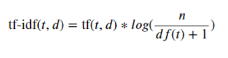

- tf(t,d)는 주어진 문서에서 단어가 사용된 횟수입니다. CountVectorizer로부터 얻을 수 있습니다.
- n은 전체 문서의 수 입니다
- df(t)는 단어 t가 사용된 문서의 수 입니다

위의 방정식에서 분모에 1을 더하는 효과는 idf를 0으로 만드는 것입니다. 예를들어 학습세트 내의 모든 문서에서 단어가 사용되었으면 전반적으로 무시되지 않을 것입니다. 결국, 각 행은 L2거리(유클리디안)로 정규화될 것입니다.(L2거리로 나눔으로써)  

문서에서 발생하는 토큰의 빈도 대신 tf-idf를 사용하는 목적은 매우 빈번하게 발생하는 토큰의 영향을 줄이는 것입니다.(단어가 많이 등장한다고 무조건 중요한 의미가 될 수 없음을 나타내는데, 대표적인 것이 위에서 봤던 불용어 the an in 등이 될 것입니다)

TfidfTransformer or Tfidfvectorizer
두 모듈 모두 tf-idf 기능의 매트릭스로 변환할 수 있습니다.  
하지만,
1. TfidfTransformer를 사용하면 CountVectorizer를 사용하여 단어 수를 체계적으로 계산한 다음 IDF(Inverse Document Frequency) 값을 계산한 다음 TF-IDF 점수만 계산합니다.
2. 반대로 Tfidfvectorizer를 사용하면 한 번에 세 단계를 모두 수행합니다. 내부적으로 동일한 데이터 세트를 사용하여 단어 수, IDF 값 및 TF-IDF 점수를 계산합니다

__Tfidftransformer__

In [44]:
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer, TfidfTransformer)
vectorizer = CountVectorizer(analyzer="word", token_pattern=r'\b[a-zA-Z]{3,}\b', ngram_range=(1,1))
count_vectorized = vectorizer.fit_transform(X_train)
tfidf = TfidfTransformer(smooth_idf=True, use_idf=True)
train_features = tfidf.fit_transform(count_vectorized).toarray()

pd.DataFrame(train_features, index = ["sentence " + str(i) for i in range(1, 1+len(X_train))],
             columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aal,aan,aannnnd,aashiqui,aba,abandon,...,zones,zoom,zotar,zouma,zourryart,zrnf,zss,zumiez,zxathetis,zzzz
sentence 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__Tfidfvectorizer__

In [45]:
# 텍스트 문서 모음을 토큰 수의 행렬로 변환합니다
tfidf = feature_extraction.text.TfidfVectorizer(encoding = "utf-8", ngram_range=(1,1), max_features=5000,
                                                norm="l2", sublinear_tf = True)

In [46]:
train_features = tfidf.fit_transform(X_train).toarray()

In [47]:
print(train_features[1])
print(train_features.shape)

[0. 0. 0. ... 0. 0. 0.]
(6090, 5000)


In [48]:
pd.DataFrame(train_features, index= ["sentence " + str(i) for i in range(1, 1+len(X_train))], 
             columns = tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,__,aa,aba,abandoned,abbswinston,abc,abcnews,abe,ability,ablaze,...,ûï,ûïa,ûïhatchet,ûïrichmond,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûó
sentence 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
dic_vocabulary = tfidf.vocabulary_

특정 단어의 위치를 알기 위해서 어휘에서 찾아볼 수 있습니다

In [50]:
word = "forest"
dic_vocabulary[word]
# 단어장에 단어가 존재한다면 N을 출력합니다
# N은 단어가 몇 번째로 자주 사용되었나를 출력합니다

1352

In [51]:
test_features = tfidf.transform(X_test).toarray()
print(test_features.shape)

(1523, 5000)


In [52]:
train_labels = Y_train
test_labels = Y_test

## 차원감소  
행렬의 차원을 줄이기 위해서 관련변수의 하위집합을 선택하는 일부 피쳐 추출을 수행할 수 있습니다.(행렬 shape : 문서 수 x 어휘의 길이) 다음과 같은 방법으로 진행하겠습니다.  

각 범주를 이진법으로 취급합니다(예 : "기술"의 범주는 기술뉴스의 경우 1이고, 다른 범주의 경우 0입니다). 피쳐와 타깃이 독립적인지 여부를 결정하기위해 카이제곱 테스트를 수행합니다. 카이제곱 검정에서 특정 p값을 갖는 기능만 유지합니다

In [53]:
"""
from sklearn import feature_selection
y = data_clean['target']
X_names = tfidf.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame({"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]

X_names = dtf_features["feature"].unique().tolist()
len(X_names)
"""

'\nfrom sklearn import feature_selection\ny = data_clean[\'target\']\nX_names = tfidf.get_feature_names()\np_value_limit = 0.95\ndtf_features = pd.DataFrame()\nfor cat in np.unique(y):\n    chi2, p = feature_selection.chi2(X_train, y==cat)\n    dtf_features = dtf_features.append(pd.DataFrame({"feature":X_names, "score":1-p, "y":cat}))\n    dtf_features = dtf_features.sort_values(["y","score"], ascending=[True,False])\n    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]\n\nX_names = dtf_features["feature"].unique().tolist()\nlen(X_names)\n'

# 카이제곱검정이란?
- 관찰된 빈도가 기대되는 빈도와 유의하게 다른지를 검증하는 방법  
- 공식 : 카이제곱값 = X^2 = sum(관측값 - 기댓값)^2/ 기댓값
- 여기에서는 카이제곱 적합도 검정을 사용함
1. 위에서 노트북 필자가 작성한 것은 p-value를 얻고 이를 통해 검정 결과가 얼마나 유의한지 확인하는 것으로 보인다
2. p-value를 구하기 위해서는 자유도 : n-1(n:카테고리 갯수)과 연구자 재량에 따라 설정하는 값 = 알파(0.05 or 0.01)가 필요
3. 위의 공식을 통해 각 데이터별 스코어(=검정 통계량)가 나오는데, 이를 모두 더한 값을 sum(X^2)라고 한다
4. 카이제곱 검정표에서 (자유도, 알파)를 이용하여 X^2의 분포표를 구한다
5. 3,4를 비교하여 검정통계량(3번과정)이 높다면 해당 가설을 기각할 수 있습니다  
5-1. 기각할 수 있는 것 뿐이지 기각해도 된다는 명분이 생긴 것이 아님
6. X^2 분포표의 값이 더 크다면 기각하여서는 안됨

공식
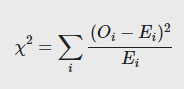

## 모델 훈련

### Multinomial NB

In [54]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_features, train_labels)

MultinomialNB()

In [56]:
mnb_prediction = mnb_classifier.predict(test_features)

### 모델 성능 시각화

In [57]:
training_accuracy = accuracy_score(train_labels, mnb_classifier.predict(train_features))
print(training_accuracy)

0.8691297208538588


In [58]:
testing_accuracy = accuracy_score(test_labels, mnb_prediction)
print(testing_accuracy)

0.7905449770190414


In [59]:
print(classification_report(test_labels, mnb_prediction))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       861
           1       0.83      0.65      0.73       662

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523



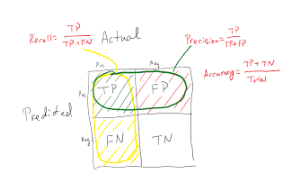

In [60]:
conf_matrix = confusion_matrix(test_labels, mnb_prediction)
print(conf_matrix)

[[771  90]
 [229 433]]


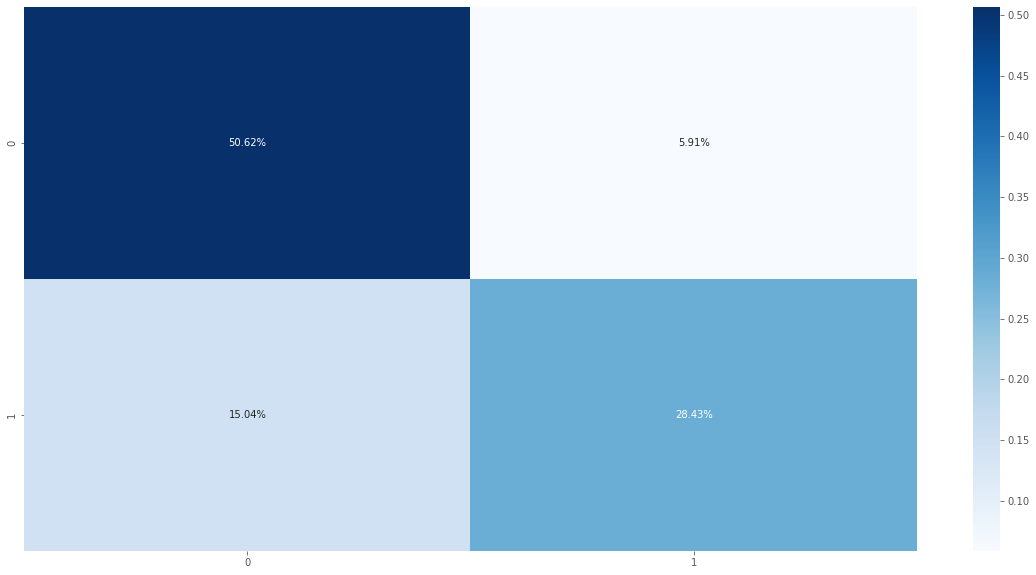

In [61]:
import seaborn as sns
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt=".2%", cmap = "Blues")

In [62]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier().fit(train_features, train_labels)

In [63]:
# predicts = knn.predict((test_features))
# print(classification_report(test_labels, predicts))

### 제출을 위한 테스트 데이터에 맞추기(fitting) 

In [64]:
test_vectorizer = tfidf.transform(data_clean_test["text_clean"]).toarray()

In [65]:
test_vectorizer.shape

(3263, 5000)

In [66]:
final_predictions = mnb_classifier.predict(test_vectorizer)

In [67]:
final_predictions

array([1, 0, 0, ..., 1, 1, 1])

In [68]:
submission_df = pd.DataFrame()

In [69]:
submission_df["id"] = data_clean_test["id"]
submission_df["target"] = final_predictions

In [70]:
submission_df

,id,target
0,0,1
1,2,0
2,3,0
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


In [71]:
submission_df["target"].value_counts()

0    2284
1     979
Name: target, dtype: int64

In [72]:
submission = submission_df.to_csv("Result.csv", index = False)